In [13]:
# Importing relevant libraries
import collections
from pprint import pprint
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [14]:
# Function to get tweets for searched term
#Text, location, dates, specified number of results
def SearchForData(search_term, nTweets):
    # Import and Initialize Sentiment Analyzer
#     from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#     analyzer = SentimentIntensityAnalyzer()
    import tweepy; import json
    from config import access_token as access_token
    from config import access_token_secret as access_token_secret
    from config import consumer_key as consumer_key
    from config import consumer_secret as consumer_secret
    # Setup Tweepy API Authentication
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

    maxTweets = 10000000 # Some arbitrary large number
    public_tweets=[]
    # Counter to keep track of the number of tweets retrieved
    counter = 0
    oldest_tweet = None
    unique_ids = []
    # Loop through 5 times (total of 500 tweets)
    desiredTweets = []
    while len(desiredTweets) < min(nTweets,maxTweets):
        # Retrieve 100 most recent tweets -- specifying a max_id
        public_tweets = api.search(search_term, count=100, result_type="recent", max_id=oldest_tweet)

        for tweet in public_tweets['statuses']:
            tweet_id = tweet["id"]

            # Append tweet_id to ids list if it doesn't already exist
            # This allows checking for duplicate tweets
            if tweet_id not in unique_ids :
                unique_ids.append(tweet_id)
                desiredTweets.append(tweet)
                                 
            # Reassign the the oldest tweet (i.e. the max_id) subtract 1 so the previous oldest isn't included
            oldest_tweet = tweet_id - 1
    return desiredTweets


               
#oneTweet = SearchForData("kitty", 100)
#oneTweet[0]


In [45]:
# Calling the function and searching a term 
tweet=SearchForData('spaceX',100)
pprint(tweet[2])
print(tweet[2]['entities']['hashtags'][0]['text'])

{'contributors': None,
 'coordinates': None,
 'created_at': 'Sat Jun 30 17:46:22 +0000 2018',
 'entities': {'hashtags': [],
              'media': [{'display_url': 'pic.twitter.com/7sSyipmfSf',
                         'expanded_url': 'https://twitter.com/SpaceX/status/1012842329927909376/photo/1',
                         'id': 1012842282867777536,
                         'id_str': '1012842282867777536',
                         'indices': [109, 132],
                         'media_url': 'http://pbs.twimg.com/media/Dg5WsKPUYAALsVE.jpg',
                         'media_url_https': 'https://pbs.twimg.com/media/Dg5WsKPUYAALsVE.jpg',
                         'sizes': {'large': {'h': 1365,
                                             'resize': 'fit',
                                             'w': 2048},
                                   'medium': {'h': 800,
                                              'resize': 'fit',
                                              'w': 1200},
       

IndexError: list index out of range

In [46]:
# Getting all hashtags in a list
hashtags = []
text=''
for t in range(100):
    for u in (tweet[t]['entities']['hashtags']):
#         print(u)
        hashtags.append(u['text'])
        
print(hashtags)
# Assigning the list to a string variable since wordcloud needs it in a string variable and can'y use list
text=' '.join(hashtags)
print(text)

['Dragon', 'Dragon', 'fortnite', 'SpaceX', 'Rocket', 'rocketlaunch', 'Dragon', 'SpaceX', 'CIMON', 'ISS', 'SpaceX', 'Launch', 'SpacePharma', 'SpaceLab', 'Indocrination', 'SpaceX', 'FakeX', 'Water', 'Moon', 'Sun', 'Earth', 'NASA', 'NASALies', 'FakeX', 'SpaceX', 'spacex', 'crs15', 'Dragon', 'spacejellyfish', 'Dragon', 'Indocrination', 'SpaceX', 'FakeX', 'noctilucent', 'ISS', 'SpotTheStation', 'MOMO2', 'Dragon', 'noctilucent', 'Fortnite', 'SpaceX', 'Fortnite', 'SpaceX', 'Launch', 'SpacePharma', 'SpaceLab', 'Falcon9', 'Dragon', 'CRS15', 'Dragon', 'CRS15', 'spacejellyfish', 'Canadarm2', 'Space1999', 'conceptart', 'anime', 'film', 'alien', 'eagle', 'SpaceX', 'Launch', 'SpacePharma', 'SpaceLab', 'Fortnite']
Dragon Dragon fortnite SpaceX Rocket rocketlaunch Dragon SpaceX CIMON ISS SpaceX Launch SpacePharma SpaceLab Indocrination SpaceX FakeX Water Moon Sun Earth NASA NASALies FakeX SpaceX spacex crs15 Dragon spacejellyfish Dragon Indocrination SpaceX FakeX noctilucent ISS SpotTheStation MOMO2 D

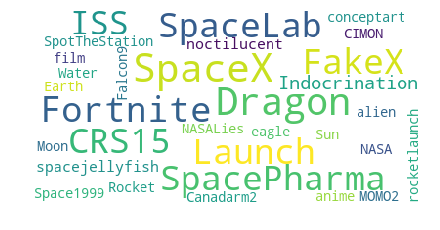

In [83]:
# Using WordCloud library to create a Wordcloud chart
wordcloud = WordCloud(background_color='white',max_words=len(text),max_font_size=40,relative_scaling=.15).generate(text)

plt.figure(figsize=(7,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('WordCloud.png',dpi=500)
plt.show()


In [84]:
# Creating a gunction to get top 5 hashtags associated with searched term
from collections import defaultdict
def leaders(xs, top=10):
    counts = defaultdict(int)
    for x in xs:
        counts[x] += 1
    return sorted(counts.items(), reverse=True, key=lambda tup: tup[1])[:top]
print(leaders(hashtags, top=5))

[('SpaceX', 9), ('Dragon', 8), ('Launch', 3), ('SpacePharma', 3), ('SpaceLab', 3)]


In [85]:
# Printing summary of the chart
tophashes=[x[0] for x in leaders(hashtags, top=5)]
print("Top 5 associated hashtags to Spacex are :",', '.join(tophashes))

Top 5 associated hashtags to Spacex are : SpaceX, Dragon, Launch, SpacePharma, SpaceLab
